In [1]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
from sklearn.preprocessing import StandardScaler
total = train_df.isnull().sum().sort_values(ascending=False)
train_df['Age'] = StandardScaler().fit_transform(train_df['Age'].values.reshape(-1, 1))
train_df['Age'].fillna(0,inplace=True)
test_df['Age'] = StandardScaler().fit_transform(test_df['Age'].values.reshape(-1, 1))
test_df['Age'].fillna(0,inplace=True)
train_df['Pclass'] = StandardScaler().fit_transform(train_df['Pclass'].values.reshape(-1, 1))
test_df['Pclass'] = StandardScaler().fit_transform(test_df['Pclass'].values.reshape(-1, 1))
train_df['Parch'] = StandardScaler().fit_transform(train_df['Parch'].values.reshape(-1, 1))
test_df['Parch'] = StandardScaler().fit_transform(test_df['Parch'].values.reshape(-1, 1))
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0.873482,"Kelly, Mr. James",male,0.298549,0,-0.400248,330911,7.8292,NaN,Q
1,893,0.873482,"Wilkes, Mrs. James (Ellen Needs)",female,1.181328,1,-0.400248,363272,7.0000,NaN,S
2,894,-0.315819,"Myles, Mr. Thomas Francis",male,2.240662,0,-0.400248,240276,9.6875,NaN,Q
3,895,0.873482,"Wirz, Mr. Albert",male,-0.231118,0,-0.400248,315154,8.6625,NaN,S
4,896,0.873482,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,-0.584229,1,0.619896,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0.873482,"Spector, Mr. Woolf",male,0.000000,0,-0.400248,A.5. 3236,8.0500,NaN,S
414,1306,-1.505120,"Oliva y Ocana, Dona. Fermina",female,0.616350,0,-0.400248,PC 17758,108.9000,C105,C
415,1307,0.873482,"Saether, Mr. Simon Sivertsen",male,0.581038,0,-0.400248,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0.873482,"Ware, Mr. Frederick",male,0.000000,0,-0.400248,359309,8.0500,NaN,S


In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
survived = pd.Series(train_df['Survived'].groupby(train_df['SibSp']).sum())
train_df['SibSp'] = StandardScaler().fit_transform(train_df['SibSp'].values.reshape(-1, 1))
test_df['SibSp'] = StandardScaler().fit_transform(test_df['SibSp'].values.reshape(-1, 1))

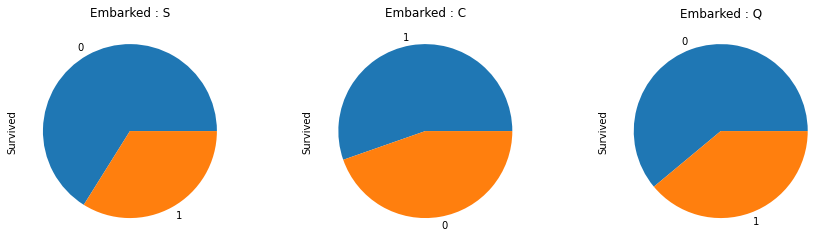

In [4]:
train_df['Sex'] = train_df['Sex'].apply(lambda x: int(x!="male"))
test_df['Sex'] = test_df['Sex'].apply(lambda x: int(x!="male"))

train_df['Embarked'].fillna('S', inplace=True)
fig = plt.figure(figsize=(15,4))
i = 1
for embarked in train_df['Embarked'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Embarked : {}'.format(embarked))
    train_df.Survived[train_df['Embarked'] == embarked].value_counts().plot(kind='pie')
    i += 1

In [5]:
replacement = {
    'S': 0,
    'Q': 1,
    'C': 2
}

train_df['Embarked'] = train_df['Embarked'].apply(lambda x: replacement.get(x))
train_df['Embarked'] = StandardScaler().fit_transform(train_df['Embarked'].values.reshape(-1, 1))
test_df['Embarked'] = test_df['Embarked'].apply(lambda x: replacement.get(x))
test_df['Embarked'] = StandardScaler().fit_transform(test_df['Embarked'].values.reshape(-1, 1))

In [6]:
train_df['Cabin'].fillna('U', inplace=True)
train_df['Cabin'] = train_df['Cabin'].apply(lambda x: x[0])
test_df['Cabin'].fillna('U', inplace=True)
test_df['Cabin'] = test_df['Cabin'].apply(lambda x: x[0])

In [7]:
replacement = {
    'T': 0,
    'U': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

train_df['Cabin'] = train_df['Cabin'].apply(lambda x: replacement.get(x))
train_df['Cabin'] = StandardScaler().fit_transform(train_df['Cabin'].values.reshape(-1, 1))
test_df['Cabin'] = test_df['Cabin'].apply(lambda x: replacement.get(x))
test_df['Cabin'] = StandardScaler().fit_transform(test_df['Cabin'].values.reshape(-1, 1))

In [8]:
feature_names = ['Pclass','Sex','SibSp','Parch','Embarked','Age','Cabin']
X_train = train_df[feature_names]
y_train = train_df['Survived']
X_train

,Pclass,Sex,SibSp,Parch,Embarked,Age,Cabin
0,0.827377,0,0.432793,-0.473674,-0.585954,-0.530377,-0.494813
1,-1.566107,1,0.432793,-0.473674,1.942303,0.571831,0.960231
2,0.827377,1,-0.474545,-0.473674,-0.585954,-0.254825,-0.494813
3,-1.566107,1,0.432793,-0.473674,-0.585954,0.365167,0.960231
4,0.827377,0,-0.474545,-0.473674,-0.585954,0.365167,-0.494813
...,...,...,...,...,...,...,...
886,-0.369365,0,-0.474545,-0.473674,-0.585954,-0.185937,-0.494813
887,-1.566107,1,-0.474545,-0.473674,-0.585954,-0.737041,1.930260
888,0.827377,1,0.432793,2.008933,-0.585954,0.000000,-0.494813
889,-1.566107,0,-0.474545,-0.473674,1.942303,-0.254825,0.960231


In [9]:
X_test = test_df[feature_names]

In [10]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train,y_train,test_size=0.33, random_state=42)

In [11]:
total = X_test.isnull().sum().sort_values(ascending=False)
total

Cabin       0
Age         0
Embarked    0
Parch       0
SibSp       0
Sex         0
Pclass      0
dtype: int64

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [26]:
clf = MLPClassifier(hidden_layer_sizes = [10,10], solver='lbfgs',max_iter=10000,
                    activation = 'tanh',alpha = 5,
                         random_state = 0).fit(X_train, y_train1)
# clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 5,
#                             random_state = 0).fit(X_train, y_train)
# 

In [27]:
clf.score(X_test1,y_test1)

0.8203389830508474

In [28]:
clf.score(X_train1,y_train1)

0.8506711409395973

In [29]:
y_predict = clf.predict(X_test)

In [30]:
sum(y_predict)

144

In [31]:
result = pd.DataFrame({'Survived':y_predict},index = test_df['PassengerId'])

In [32]:
result

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [33]:
result.to_csv('result.csv')

In [34]:
df = pd.read_csv('result.csv')
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
